<a href="https://colab.research.google.com/github/nik-hil-24/DS403-Introduction-To-Statistical-Learning/blob/main/Assignment-3/init0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set Style
sns.set(style='darkgrid')

# **Task 1.1**

**I. Model**

In [5]:
# Linear Regression Model With In-Built L2-penalty using Matrix Form
class LinearRegression:
    def __init__(self, X_train, target, lambdaRidge=0):
        """
        LinearRegression: Linear Regression Model
        X_train (DataFrame): Independent Variables
        target (DataFrame): Dependent Variable
        lambdaRidge (float): L2-penalty Coefficient
        """

        self.target = target
        self.lambdaRidge = lambdaRidge
        self.rows, _ = X_train.shape

        # X is [feature-1,feature-2,...] we want [1,feature-1,feature-2,...] to perform matrix dot-product
        ones = np.ones((self.rows,1))
        self.mat_X = np.concatenate((ones, X_train), axis = 1)

        # Weights Variable
        self.cols = self.mat_X.shape[1]
        self.theta = np.zeros((self.cols,1))

    def fit(self):
        I = np.identity(self.cols)
        self.theta = np.dot(np.linalg.inv(np.dot(self.mat_X.T,self.mat_X)+self.lambdaRidge*I),
                            np.dot(self.mat_X.T,self.target))

    def calcCost(self, input, output):
        rows, _ = input.shape
        ones = np.ones((rows,1))
        mat_X = np.concatenate((ones, input), axis = 1)
        tempval = np.dot(mat_X, self.theta) - output
        return np.sum(np.power(tempval, 2))/(2*rows) + self.lambdaRidge*np.sum(np.power(self.theta,2))

**II. Plots**

In [6]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/ISL Assgn-3/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
# Split Dataset
X = df.drop(['Sales'], axis = 'columns')
y = df[['Sales']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
def plotTSNE(X,y):
    # TSNE in 2-D
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    X_tsne_data = np.vstack((X_tsne.T, df['Sales'])).T
    df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1','Dim2','Target'])

    # Plot
    sns.scatterplot(data=df_tsne, hue='Target', x='Dim1', y='Dim2')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show();

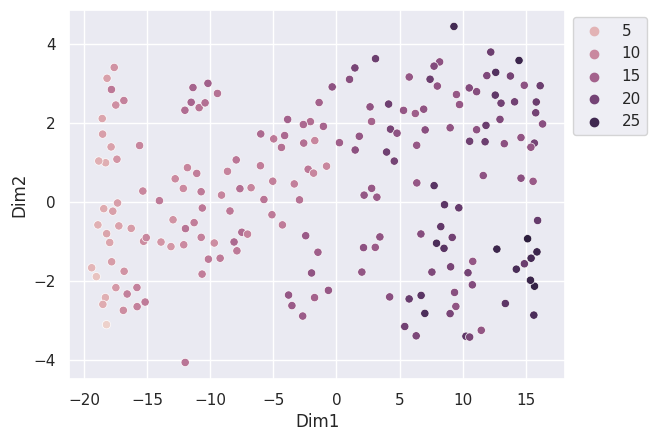

In [9]:
plotTSNE(X,y)

**III. Linear Regression with and without L2-penalty**

In [10]:
# Vanilla Linear Reg
simpleLinearReg = LinearRegression(X_train,y_train)
simpleLinearReg.fit()

# Ridge Reg
ridgeReg = LinearRegression(X_train,y_train,lambdaRidge=0.01)
ridgeReg.fit()

In [11]:
# Losses
linearRegTrainLoss = simpleLinearReg.calcCost(X_train,y_train)[0]
linearRegTestLoss = simpleLinearReg.calcCost(X_test,y_test)[0]

ridgeRegTrainLoss = ridgeReg.calcCost(X_train,y_train)[0]
ridgeRegTestLoss = ridgeReg.calcCost(X_test,y_test)[0]

print(f"For Simple Linear Regression Model, the train loss and test loss are {round(linearRegTrainLoss,3)} and {round(linearRegTestLoss,3)} respectively.")
print(f"For Ridge Regression Model, the train loss and test loss are {round(ridgeRegTrainLoss,3)} and {round(ridgeRegTestLoss,3)} respectively.")

For Simple Linear Regression Model, the train loss and test loss are 1.39 and 1.233 respectively.
For Ridge Regression Model, the train loss and test loss are 1.614 and 1.458 respectively.


**IV. Experiment with lambda val**

In [12]:
# Values Of Lambda For Ridge Regression
lambdaLog = np.linspace(-3,3.1,110)
lambdaVals = np.exp(lambdaLog)

trainLoss = []
testLoss = []

for val in lambdaVals:
    # Train Model
    model = LinearRegression(X_train,y_train,lambdaRidge=val)
    model.fit()
    # Calc Loss
    l1 = model.calcCost(X_train,y_train)[0]
    l2 = model.calcCost(X_test,y_test)[0]
    # Append To List
    trainLoss.append(l1)
    testLoss.append(l2)

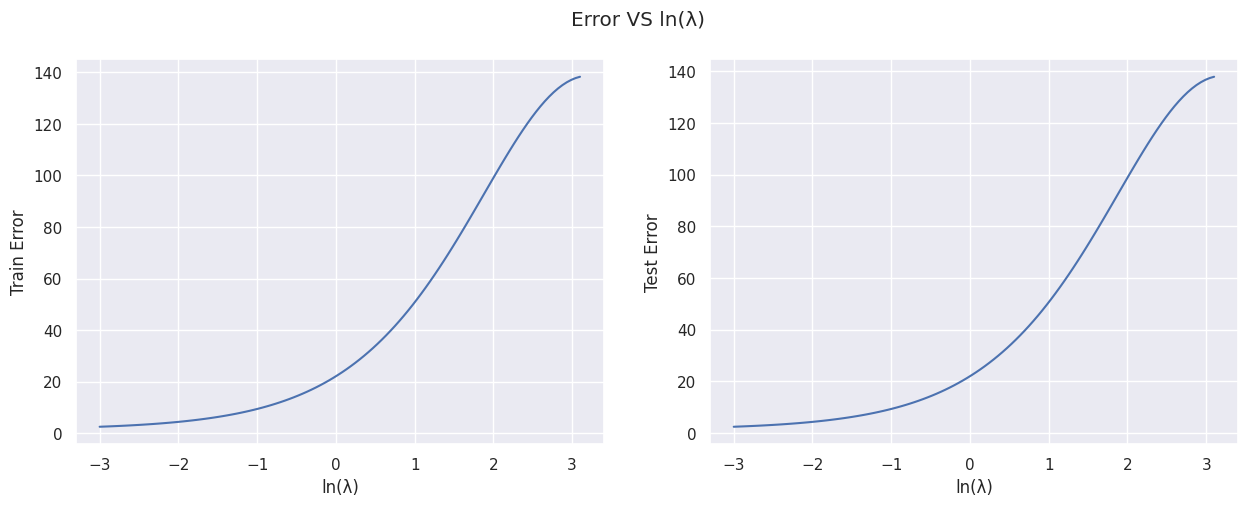

In [13]:
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Error VS ln(λ)')

ax[0].plot(lambdaLog, trainLoss)
ax[0].set_xlabel("ln(λ)")
ax[0].set_ylabel("Train Error")

ax[1].plot(lambdaLog, testLoss)
ax[1].set_xlabel("ln(λ)")
ax[1].set_ylabel("Test Error");

# **Task 1.2**

**I. Scale Data**

In [14]:
# Scale Data
dfNorm = pd.DataFrame(normalize(df))
dfStd = pd.DataFrame(StandardScaler().fit_transform(df))

dfNorm.columns = df.columns
dfStd.columns = df.columns

In [15]:
# Split Datasets
XNorm = dfNorm.drop(['Sales'], axis = 'columns')
yNorm = dfNorm[['Sales']]

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(XNorm, yNorm, test_size = 0.2)

XStd = dfStd.drop(['Sales'], axis = 'columns')
yStd = dfStd[['Sales']]
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(XStd, yStd, test_size = 0.2)

**II. t-sne Plot**

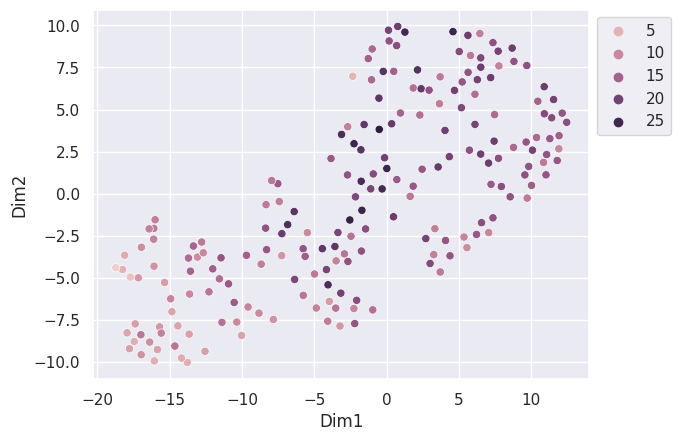

In [16]:
# For Normalized Data
plotTSNE(XNorm,yNorm)

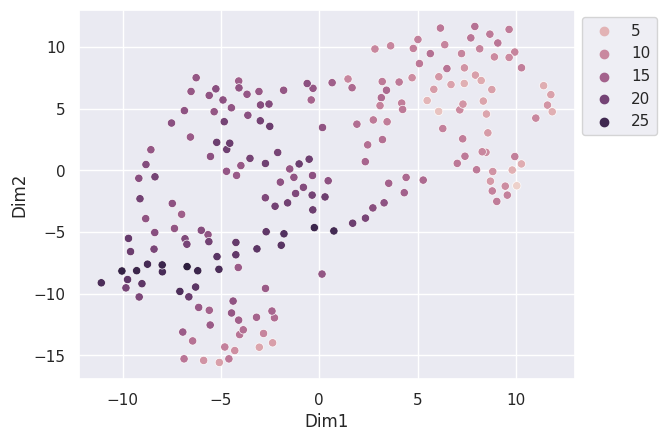

In [17]:
# For Standardized Data
plotTSNE(XStd,yStd)

**III. Compare Errors**

In [18]:
# Vanilla Linear Reg
simpleLinearReg = LinearRegression(X_train_norm,y_train_norm)
simpleLinearReg.fit()

# Ridge Reg
ridgeReg = LinearRegression(X_train_norm,y_train_norm,lambdaRidge=0.01)
ridgeReg.fit()

# Losses
linearRegTrainLoss = simpleLinearReg.calcCost(X_train_norm,y_train_norm)[0]
linearRegTestLoss = simpleLinearReg.calcCost(X_test_norm,y_test_norm)[0]

ridgeRegTrainLoss = ridgeReg.calcCost(X_train_norm,y_train_norm)[0]
ridgeRegTestLoss = ridgeReg.calcCost(X_test_norm,y_test_norm)[0]

print(f"For Simple Linear Regression Model with Normalized Data, the train loss and test loss are {round(linearRegTrainLoss,5)} and {round(linearRegTestLoss,5)} respectively.")
print(f"For Ridge Regression Model with Normalized Data, the train loss and test loss are {round(ridgeRegTrainLoss,5)} and {round(ridgeRegTestLoss,5)} respectively.")

For Simple Linear Regression Model with Normalized Data, the train loss and test loss are 0.00084 and 0.00037 respectively.
For Ridge Regression Model with Normalized Data, the train loss and test loss are 0.00119 and 0.00071 respectively.


In [19]:
# Vanilla Linear Reg
simpleLinearReg = LinearRegression(X_train_std,y_train_std)
simpleLinearReg.fit()

# Ridge Reg
ridgeReg = LinearRegression(X_train_std,y_train_std,lambdaRidge=0.01)
ridgeReg.fit()

# Losses
linearRegTrainLoss = simpleLinearReg.calcCost(X_train_std,y_train_std)[0]
linearRegTestLoss = simpleLinearReg.calcCost(X_test_std,y_test_std)[0]

ridgeRegTrainLoss = ridgeReg.calcCost(X_train_std,y_train_std)[0]
ridgeRegTestLoss = ridgeReg.calcCost(X_test_std,y_test_std)[0]

print(f"For Simple Linear Regression Model with Standardized Data, the train loss and test loss are {round(linearRegTrainLoss,5)} and {round(linearRegTestLoss,5)} respectively.")
print(f"For Ridge Regression Model with Standardized Data, the train loss and test loss are {round(ridgeRegTrainLoss,5)} and {round(ridgeRegTestLoss,5)} respectively.")

For Simple Linear Regression Model with Standardized Data, the train loss and test loss are 0.05585 and 0.02042 respectively.
For Ridge Regression Model with Standardized Data, the train loss and test loss are 0.06453 and 0.02911 respectively.


# **Task 2**

**I. Train Model**

In [20]:
# Dataset
df=pd.read_csv('/content/drive/MyDrive/ISL Assgn-3/banknote_authentication.csv')

# Split Target and Independent Variables
X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [21]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
class LogisticRegression():
	def __init__(self,lr,iters):
		self.lr = lr
		self.iters = iters

	def fit(self,X,Y):
		self.rows, self.cols = X.shape
		# Weights
		self.W = np.zeros(self.cols)
		self.b = 0
		self.X = X
		self.y = Y
        # Gradient Descent
		for i in range(self.iters) :
			self.update_weights()
		return self

	def update_weights(self):
        # Predict Vals
		pred=1/(1+np.exp(-(self.X.dot(self.W)+self.b)))
		# Calculate Gradient
		diff = (pred-self.y.T)
		diff = np.reshape(diff,self.rows)
		dW = np.dot(self.X.T,diff)/self.rows
		db = np.sum(diff)/self.rows
		# Weight Update
		self.W=self.W-self.lr*dW
		self.b=self.b-self.lr*db
		return self

	def predict(self,X):
		Z = 1/(1+np.exp(-(X.dot(self.W)+self.b)))
		Y = np.where(Z>0.5,1,0)
		return Y

In [23]:
# Model training
model = LogisticRegression(lr=0.1,iters=1000)
model.fit(X_train,y_train)

**II. Accuracy Verification**

In [24]:
# Accuracy
y_pred = model.predict(X_test)
correct = 0

for count in range(np.size(y_pred)) :
    if y_test[count]==y_pred[count]:
        correct=correct+1
    count=count+1

print( "Accuracy on test set by our model: ", (correct/count)*100)

Accuracy on test set by our model:  99.27272727272727


# **Task 3**

**I. Load the data and plot the stock value VS time**

In [25]:
df = pd.read_excel("/content/drive/MyDrive/ISL Assgn-3/Apple_stock_data.xlsx")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/29/2023,$171.21,51861080,$172.02,$173.07,$170.341
1,09/28/2023,$170.69,56294420,$169.34,$172.03,$167.62
2,09/27/2023,$170.43,66921810,$172.62,$173.04,$169.05
3,09/26/2023,$171.96,64588950,$174.82,$175.20,$171.66
4,09/25/2023,$176.08,46172740,$174.20,$176.97,$174.15


In [26]:
# Converting columns to proper format
df["Date"]=pd.to_datetime(df["Date"])
df=df.sort_values(by="Date")
df["Close/Last"]=df["Close/Last"].str.replace("$", "").astype(float)
df["Volume"]=df["Volume"].astype(float)
df["Open"]=df["Open"].str.replace("$", "").astype(float)
df["High"]=df["High"].str.replace("$", "").astype(float)
df["Low"]=df["Low"].str.replace("$", "").astype(float)

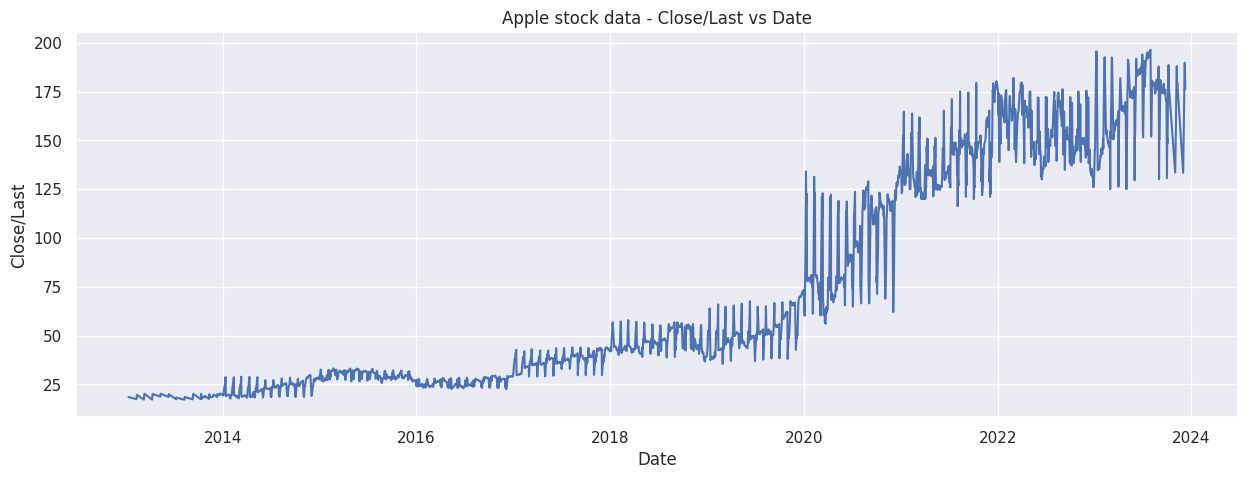

In [27]:
# Plot: Close/Last vs Date
plt.figure(figsize=(15, 5))
sns.set_style("darkgrid")
sns.lineplot(x="Date", y="Close/Last", data=df)
plt.title("Apple stock data - Close/Last vs Date")
plt.xlabel("Date")
plt.ylabel("Close/Last")
plt.show();